In [1]:
#ATTENTION! allFaces.mat is not added to DATA folder due the github upload file size restrictions. DONT run exercise 3

# Exercise 1.1

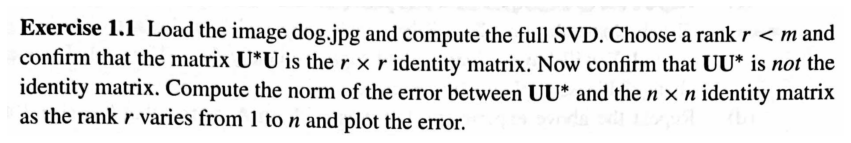

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.1.png'))
plt.axis('off');

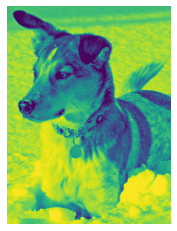

In [3]:
DOG = imread('../DATA/dog.jpg')
DOG = np.mean(DOG, -1)
plt.imshow(DOG)
plt.axis('off');

In [4]:
U_dog, S_dog, VT_dog = np.linalg.svd(DOG, full_matrices=True)

In [5]:
#Let r be
r = U_dog.shape[0] - VT_dog.shape[0]
print('r =',r)

r = 500


In [6]:
#It's the identity matrix
np.linalg.inv(U_dog[:r,:r]) @ U_dog[:r,:r]

array([[ 1.00000000e+00,  7.70938868e-13,  6.11199980e-12, ...,
         7.92965693e-12,  1.22355459e-11, -3.09796633e-12],
       [ 3.30890870e-12,  1.00000000e+00,  5.29531974e-12, ...,
         7.90123522e-12,  9.66338121e-12, -3.48165941e-12],
       [-3.94129174e-13,  2.52176058e-12,  1.00000000e+00, ...,
        -1.03028697e-12, -1.02460262e-11,  5.81934501e-12],
       ...,
       [-6.23112673e-15, -1.36696210e-14, -2.54726795e-14, ...,
         1.00000000e+00, -9.54791801e-15, -1.88737914e-15],
       [-2.93098879e-14, -9.57567359e-15, -5.57887070e-14, ...,
         1.24344979e-14,  1.00000000e+00,  3.64153152e-14],
       [-2.57016630e-14, -6.66133815e-16, -3.89688282e-14, ...,
         9.99200722e-15,  6.88338275e-15,  1.00000000e+00]])

In [7]:
#It's still the identity matrix...
U_dog[:r,:r] @ np.linalg.inv(U_dog[:r,:r])

array([[ 1.00000000e+00, -3.43058915e-14, -8.70414851e-14, ...,
         2.22044605e-14, -1.40998324e-14,  4.71844785e-15],
       [-1.29896094e-14,  1.00000000e+00,  1.33226763e-15, ...,
         2.64233080e-14, -1.44884105e-14, -6.93195501e-15],
       [-1.23234756e-14, -3.55271368e-15,  1.00000000e+00, ...,
         5.13478149e-14, -1.03250741e-14,  2.77555756e-15],
       ...,
       [ 1.17406085e-14, -7.47180096e-14, -9.19264664e-14, ...,
         1.00000000e+00, -2.75057754e-14,  2.38697950e-15],
       [-1.55431223e-15,  4.77395901e-14, -8.73745520e-14, ...,
        -9.99200722e-15,  1.00000000e+00, -7.66053887e-15],
       [ 0.00000000e+00, -8.88178420e-16, -4.21884749e-15, ...,
         1.55431223e-15, -7.88258347e-15,  1.00000000e+00]])

In [8]:
loss = [np.linalg.norm(U_dog[:r,:r] @ np.linalg.inv(U_dog[:r,:r]) - np.eye(r)) for r in range(U_dog.shape[0])]

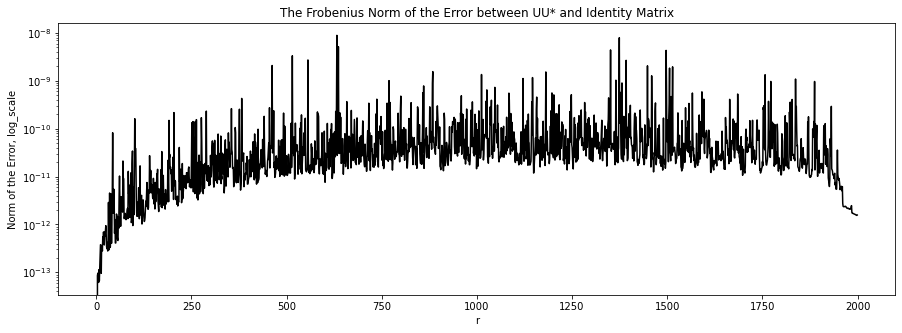

In [9]:
plt.figure(figsize=(15,5))
plt.title('The Frobenius Norm of the Error between UU* and Identity Matrix')
plt.xlabel('r')
plt.ylabel('Norm of the Error, log_scale')
plt.yscale('log')
plt.plot(loss, color='black');

# Exercise 1.2

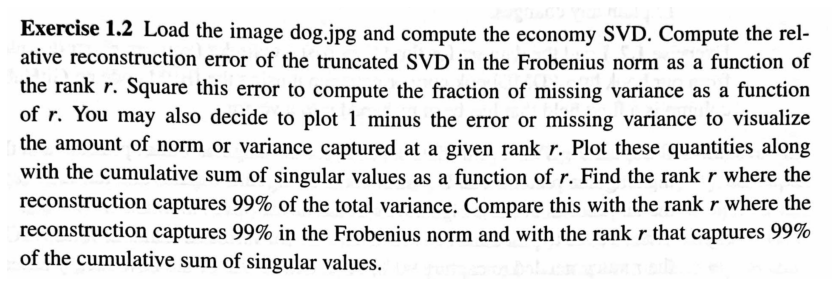

In [10]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.2.png'))
plt.axis('off');

In [11]:
U_dog_economy, S_dog_economy, VT_dog_economy = np.linalg.svd(DOG, full_matrices=False)

In [12]:
def rel_reconstruction_errror(image, U,S,VT, r, prints=True):
    er = abs(np.linalg.norm(U[:r,:r] @ np.diag(S)[:r,:r] @ VT[:r,:r])/np.linalg.norm(image) - 1)
    if prints:
        print('For truncation at r =', r)
        print('The Relative reconstruction error =', er)
        
    return er

test = rel_reconstruction_errror(DOG, U_dog_economy, S_dog_economy, VT_dog_economy, 1)

For truncation at r = 1
The Relative reconstruction error = 0.9993040957251453


In [13]:
print('Fraction of missing variance at r = 1 is ', test**2)

Fraction of missing variance at r = 1 is  0.9986086757330505


In [15]:
test = [rel_reconstruction_errror(DOG, U_dog_economy, S_dog_economy, VT_dog_economy, r, prints=False) for r in range(len(S_dog_economy))]

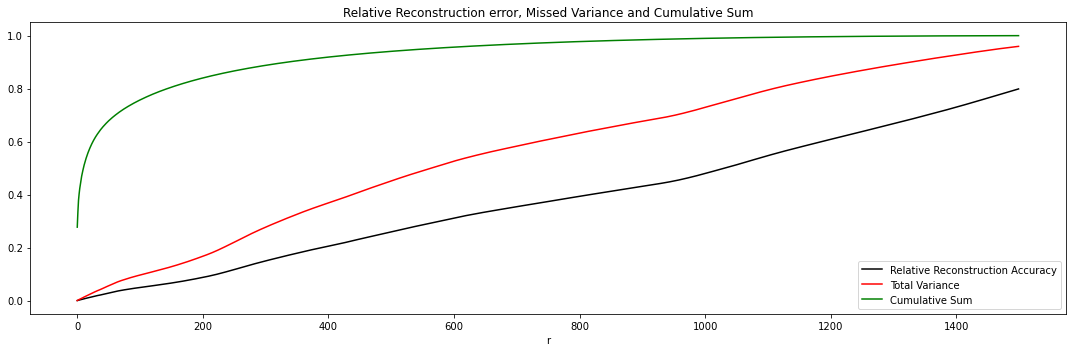

In [16]:
plt.figure(figsize=(15,5))

plt.title('Relative Reconstruction error, Missed Variance and Cumulative Sum')
plt.xlabel('r')
plt.plot(1-np.array(test), color='black', label='Relative Reconstruction Accuracy')
plt.plot(1-np.array(test)**2, color='red', label='Total Variance')
plt.plot(np.cumsum(S_dog_economy)/sum(S_dog_economy), color='green', label='Cumulative Sum')
plt.legend();

plt.tight_layout()

So, as we can see, 99% of cumsum approaches at r approximately equals to 1006

However, at the same r we get only about 75% total variance, we need to take r up to 1400-1500 in order to get 99%

The Relative Reconstruction Accuracy even can't approach to 99%

# Exercise 1.3

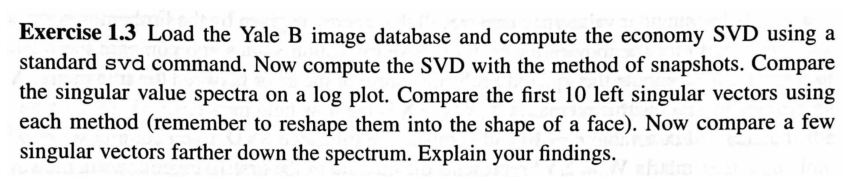

In [17]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.3.png'))
plt.axis('off');

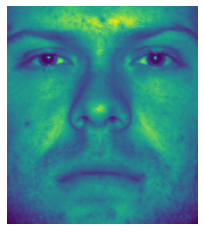

In [83]:
#I hope it's the Yale B image database, because otherwise there is no details about how I can load it
#Let me do this task for 36 faces in order to safe computing time
mat_contents = scipy.io.loadmat('../DATA/allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])

plt.imshow(faces[:,0].reshape(m,n).T)
plt.axis('off');

In [23]:
U_yale_economy, S_yale_economy, VT_yale_economy = np.linalg.svd(faces[:,:36], full_matrices=False)

In [24]:
V_S2_VT = faces[:,:36].T @ faces[:,:36]

In [65]:
S2_MoS, V_MoS = np.linalg.eig(V_S2_VT)
S_MoS = np.sqrt(abs(S2_MoS))

In [67]:
S_MoS

array([68.18363766, 28.46662257, 28.63454782, 26.86931057, 26.14699796,
       24.97554587, 25.4228909 , 23.10376224, 22.85394486, 22.14945392,
       21.15094093, 20.77110163, 24.37322887, 23.44722882, 18.04144518,
       22.28072398, 21.588393  , 20.82468913, 20.4098812 , 16.76735551,
       15.93930853, 14.42498224, 13.50113719, 18.6483475 , 10.03943164,
       17.31193668, 16.68151249, 15.17421428,  7.66116719,  5.07244585,
       13.08691597,  4.34006527,  6.44038459, 11.24459726,  9.30446987,
       10.38143991])

In [68]:
U_MoS = faces[:,:36] @ V_MoS @ np.linalg.inv(np.diag(S_MoS))

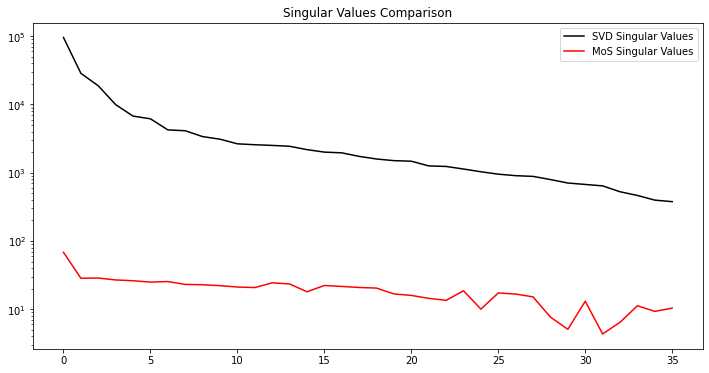

In [70]:
plt.figure(figsize=(12,6))
plt.plot(S_yale_economy, color='black', label='SVD Singular Values')
plt.plot(S_MoS, color='red', label='MoS Singular Values')
plt.yscale('log')
plt.title('Singular Values Comparison')
plt.legend();

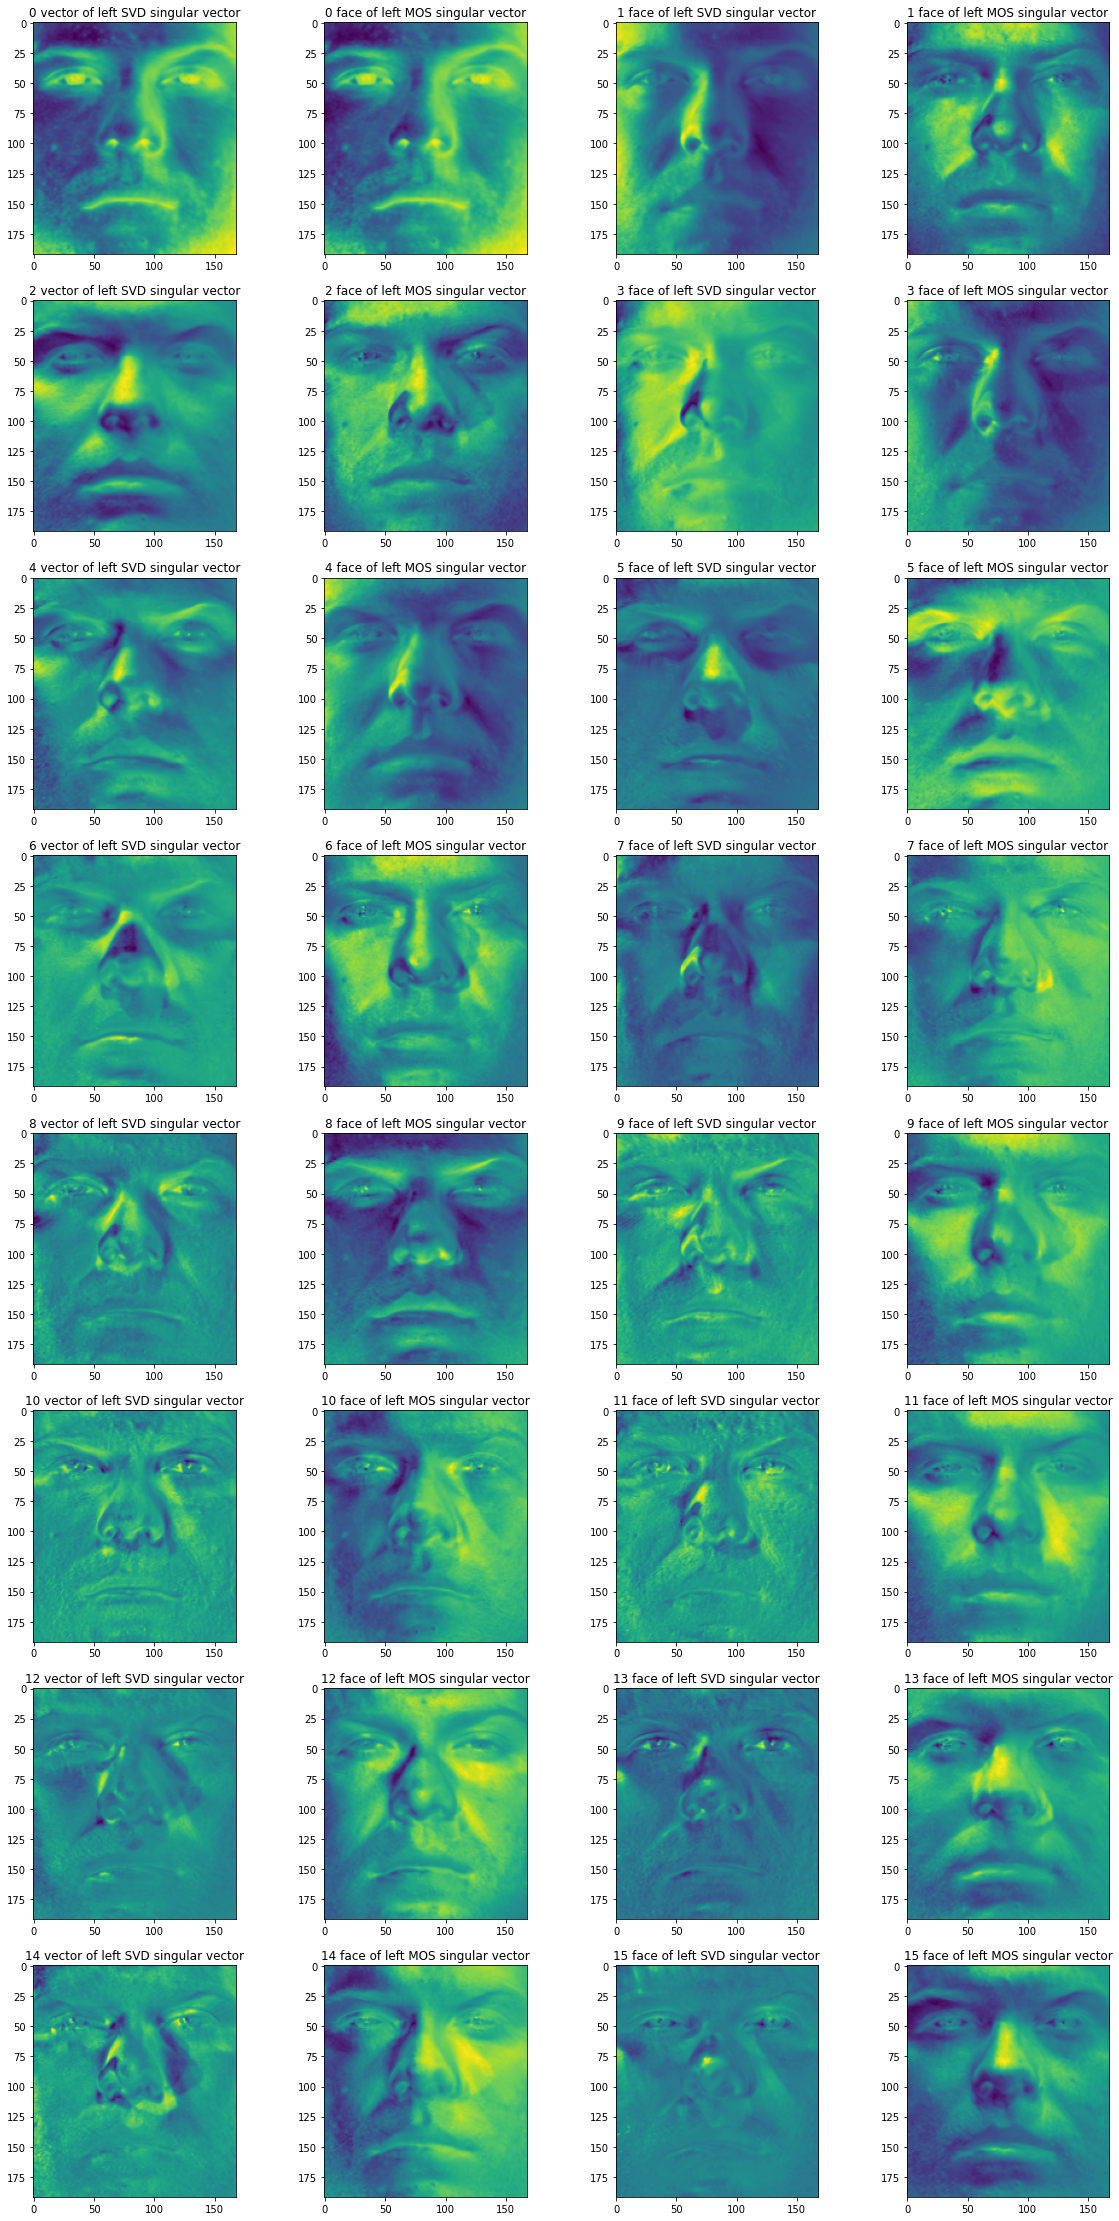

In [84]:
f, ax = plt.subplots(8, 4, figsize=(20,40))

for i in range(8):
    
    ax[i][0].imshow(U_yale_economy[:, i*2].reshape(m,n).T)
    ax[i][0].set_title('{} vector of left SVD singular vector'.format(i*2))
    ax[i][1].imshow(U_MoS[:, i*2].reshape(m,n).T)
    ax[i][1].set_title('{} face of left MOS singular vector'.format(i*2))
    
    ax[i][2].imshow(U_yale_economy[:,i*2+1].reshape(m,n).T)
    ax[i][2].set_title('{} face of left SVD singular vector'.format(i*2+1))
    ax[i][3].imshow(U_MoS[:,i*2+1].reshape(m,n).T)
    ax[i][3].set_title('{} face of left MOS singular vector'.format(i*2+1))

I am not sure that this is how they asked to compare, but 

At first, the spectrum of the snapshot method is exactly the same as the original svd gives, but then the tones start to differ slightly.

What really matters the method of snapshots and svd are very similar to each other. Both produce the same picture, however it seems like SVD resolution decreases with each vector iteration, while method of snapshots differ only in tones.

# Exercise 1.4

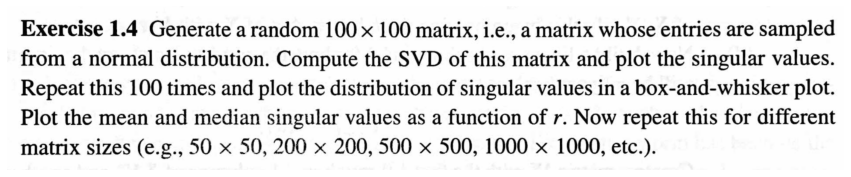

In [10]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.4.png'))
plt.axis('off');

In [11]:
A = np.random.normal(size=(100,100))
U_A, S_A, VT_A = np.linalg.svd(A, full_matrices=True)
S_A

array([19.8499399 , 18.97649326, 18.78969759, 18.38926955, 18.18386336,
       17.87869832, 17.37953039, 17.05497337, 16.92582224, 16.20261582,
       16.12103254, 15.67032264, 15.45306115, 15.08801827, 15.04292861,
       14.93508463, 14.5731161 , 14.33354262, 14.09571855, 13.99132129,
       13.58434774, 13.45573785, 13.21083332, 12.92354397, 12.76279874,
       12.64658905, 12.3524719 , 12.25916036, 11.96171484, 11.83065729,
       11.66575158, 11.44329689, 11.17816249, 11.01983172, 10.89267426,
       10.69123112, 10.60903712, 10.49687493, 10.15444707,  9.85769241,
        9.80533282,  9.59658618,  9.45822374,  9.20764033,  8.89431816,
        8.81776799,  8.59930183,  8.52177066,  8.37935611,  8.14767613,
        7.96079462,  7.83432601,  7.58449356,  7.42037224,  7.35042989,
        7.27863981,  7.11469751,  6.95546895,  6.7635735 ,  6.62843901,
        6.29604516,  6.25198209,  6.04782546,  5.8664381 ,  5.69474699,
        5.64528846,  5.39096458,  5.31479526,  4.91186912,  4.85

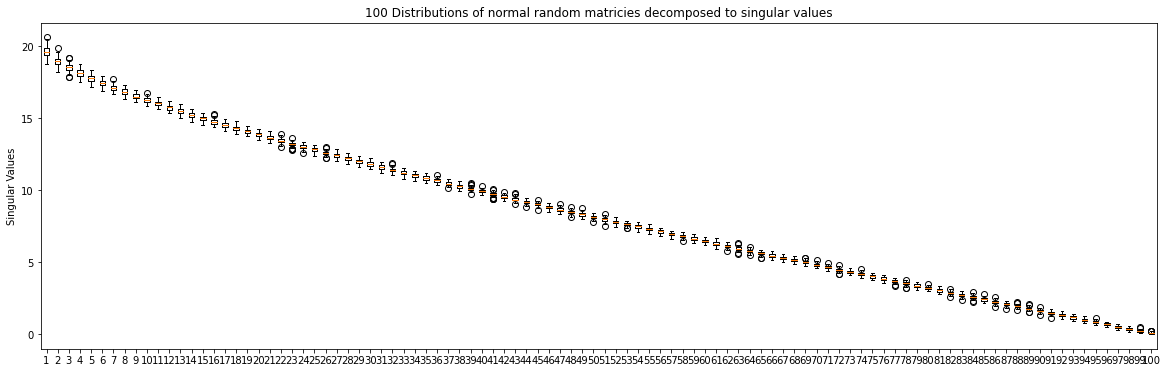

In [12]:
plt.figure(figsize=(20,6))
plt.boxplot(np.array([np.linalg.svd(np.random.normal(size=(100,100)), full_matrices=True)[1] for i in range(100)]))
plt.title('100 Distributions of normal random matricies decomposed to singular values')
plt.ylabel('Singular Values');

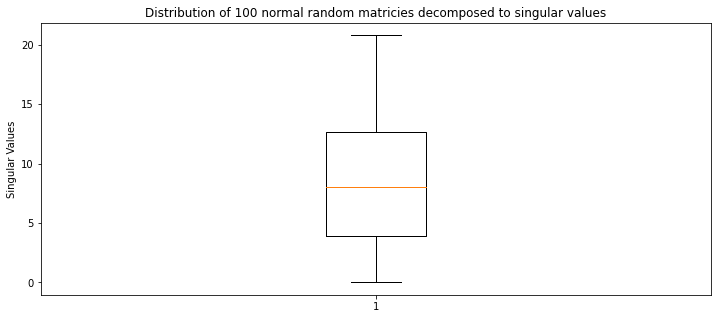

In [13]:
plt.figure(figsize=(12,5))
plt.boxplot(np.array([np.linalg.svd(np.random.normal(size=(100,100)), full_matrices=True)[1] for i in range(100)]).reshape(-1,1))
plt.title('Distribution of 100 normal random matricies decomposed to singular values')
plt.ylabel('Singular Values');

In [14]:
def my_median(S):
    res = []
    for i in range( S.shape[0]):
        res.append(np.median(S[:i+1]))
    return res

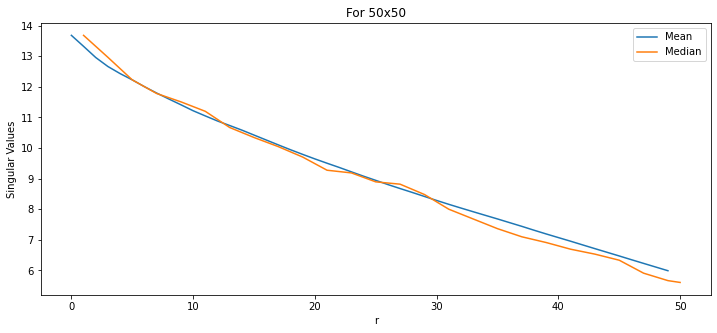

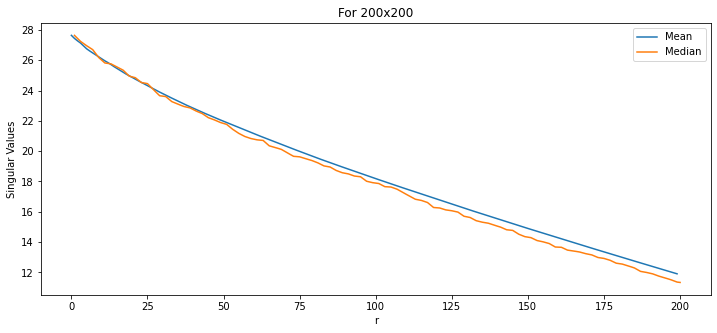

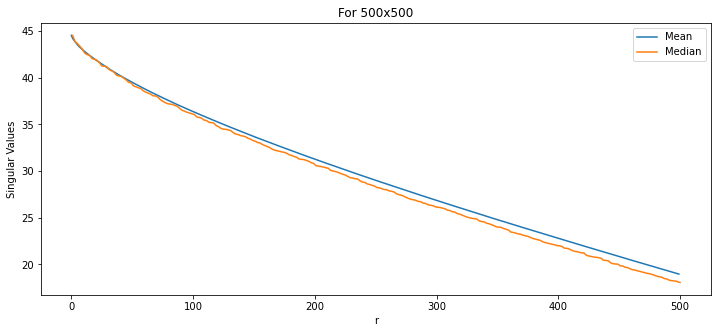

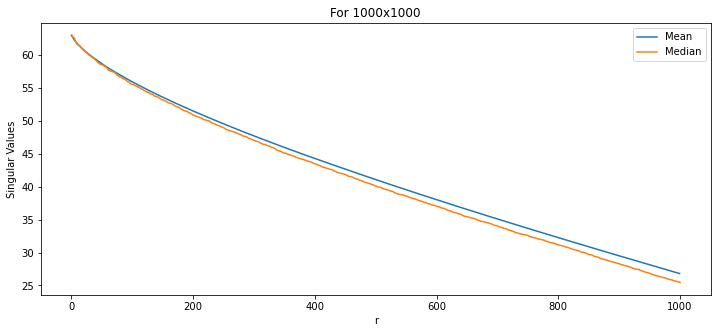

In [15]:
for i in [50, 200, 500, 1000]:
    temp_S = np.linalg.svd(np.random.normal(size=(i,i)), full_matrices=True)[1]
    
    plt.figure(figsize=(12,5))
    plt.title('For {}x{}'.format(i,i))
    plt.ylabel('Singular Values')
    plt.xlabel('r')
    plt.plot(np.cumsum(temp_S)/np.arange(1,len(temp_S)+1), label='Mean')
    plt.plot(np.arange(1,len(temp_S)+1), my_median(temp_S), label='Median')
    plt.legend()